In [14]:
import nbsetup
from models.sparc.result import Result
from models.sparc.mcmc import mcmc
from models.sparc.analysis import Analysis
from models.equations import null_gravity

In [15]:
from models.load import load_sparc
simulations = load_sparc(namespace='sparc_projected')

In [16]:
NULL_TYPE = 2
NAME = 'EXPERIMENT'
DATASET = 'Quality_Threshold'

In [17]:
default = Result(simulations=simulations, null_type=NULL_TYPE)

In [23]:
aa = Analysis(mcmc(default.datasets()[DATASET], train_inc=True), null_function=null_gravity, name=NAME)

In [24]:
aa.Result(simulations=simulations, fast=True, null_type=NULL_TYPE)

{'gamma': array(19.99994701), 'alpha': array(0.23912902)}

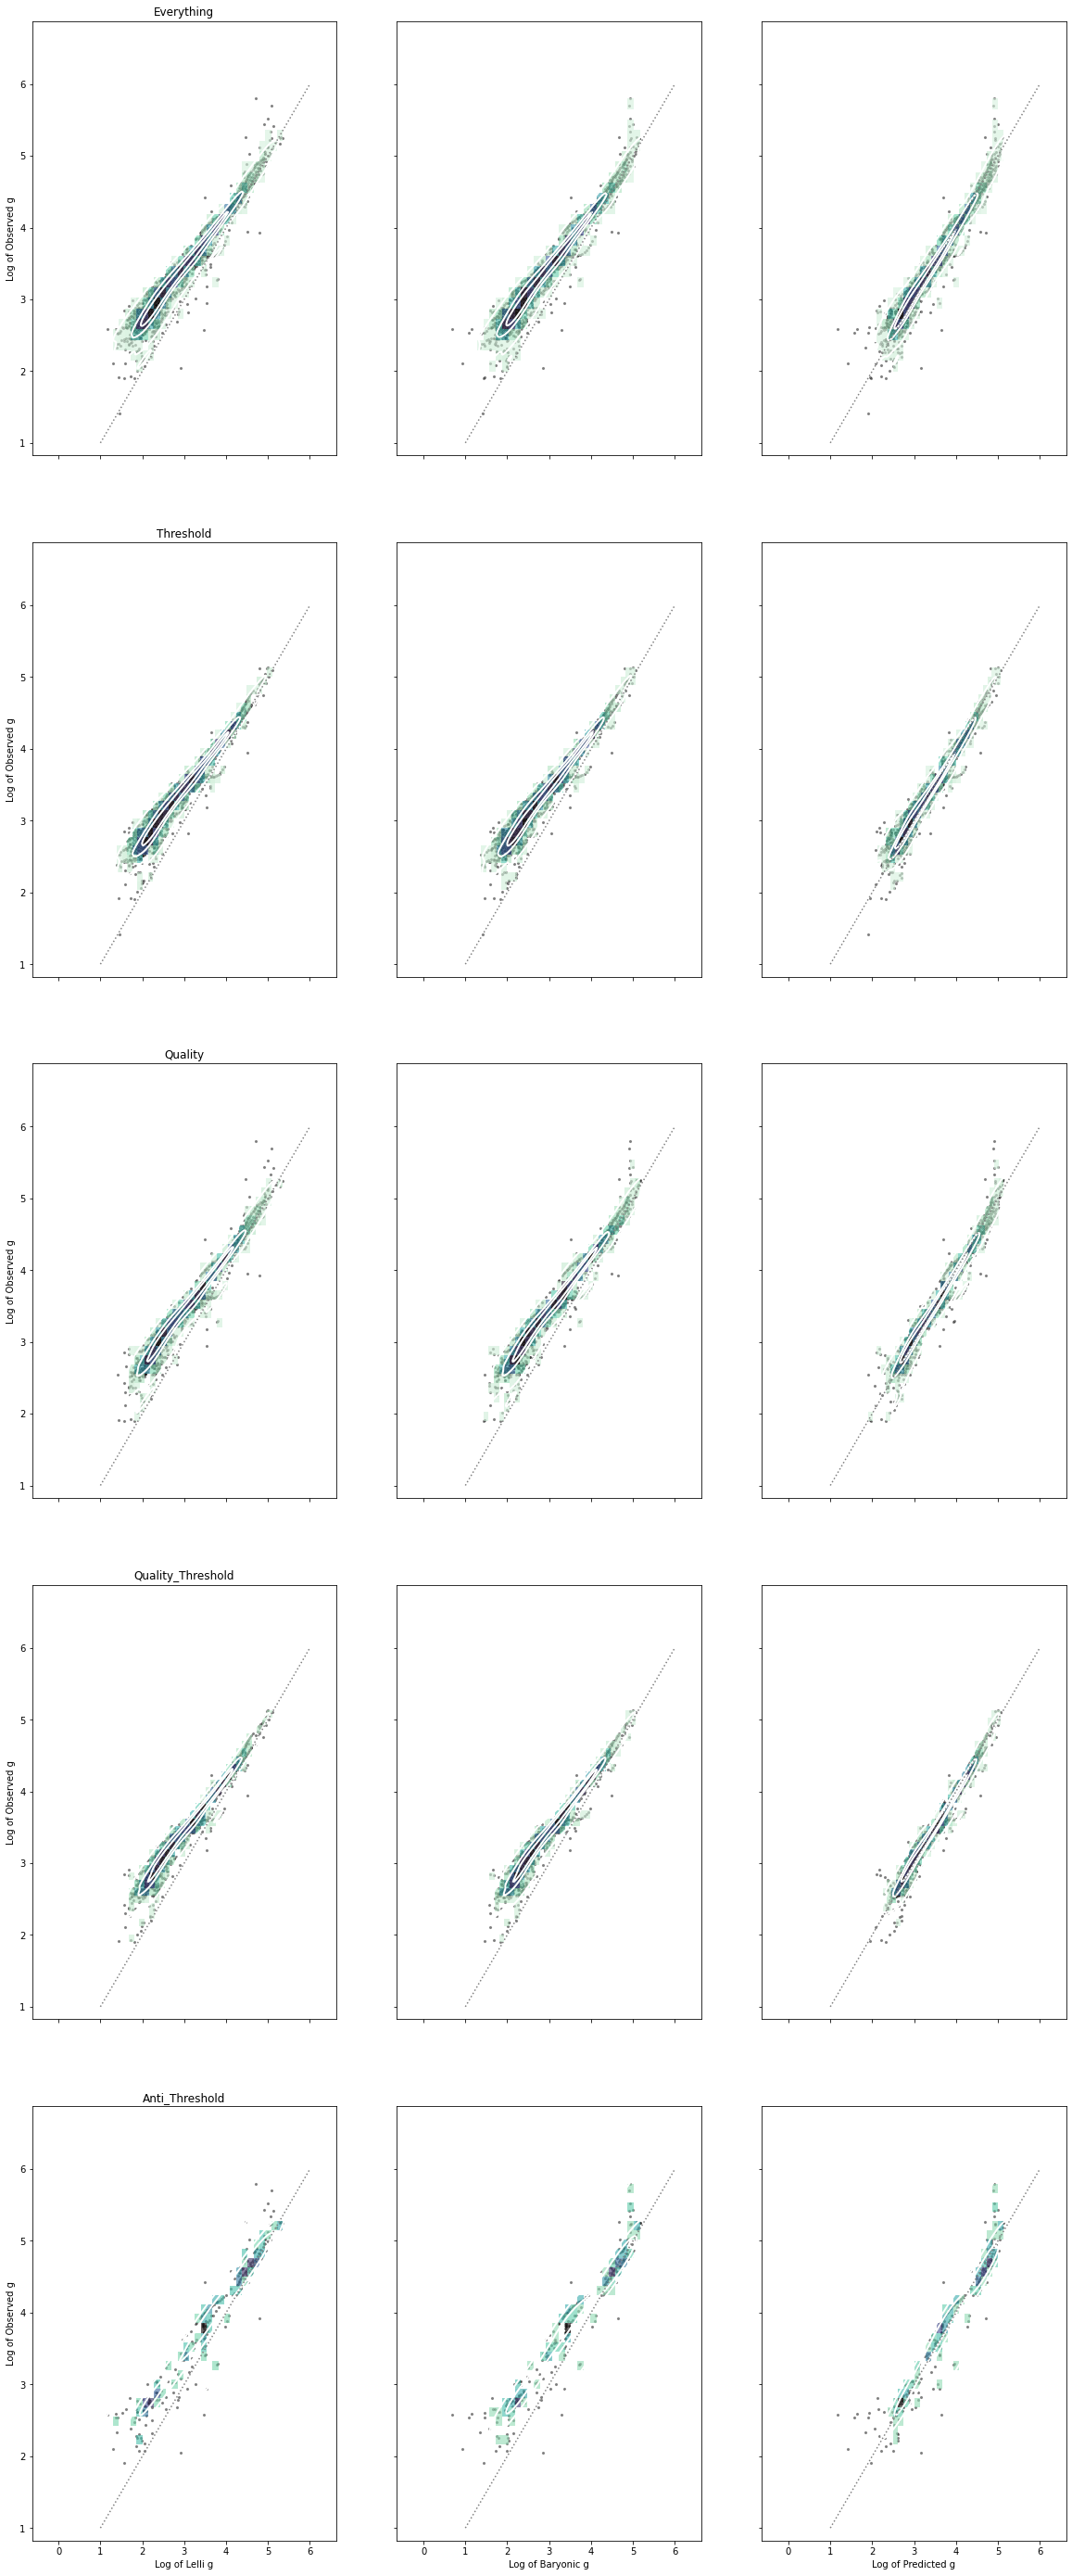

In [25]:
aa.result.plot_rar(kind=1)
aa.uni

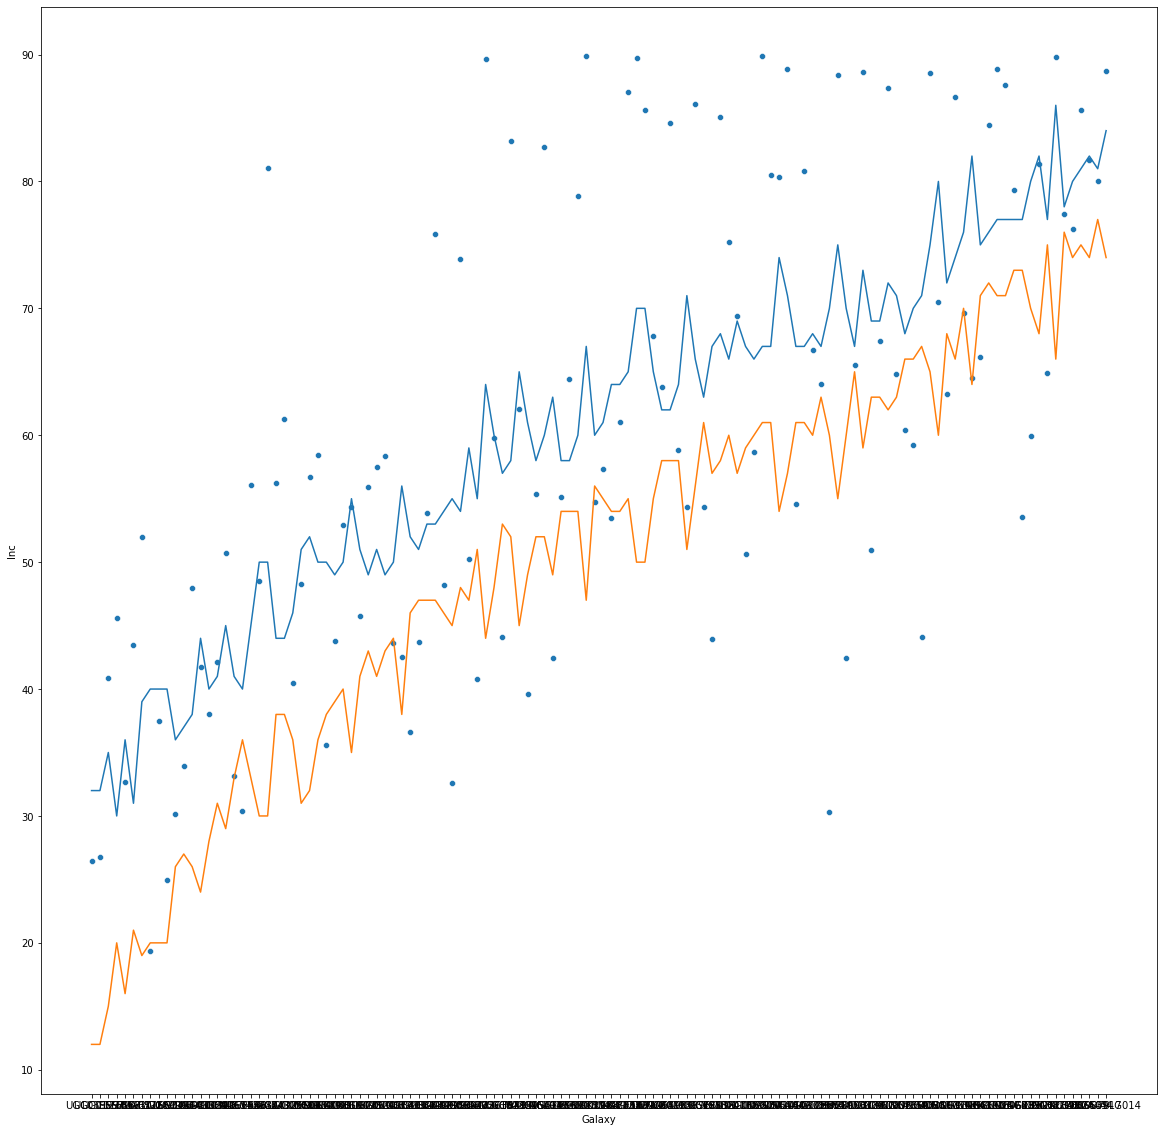

In [27]:
import matplotlib.pyplot as plt
from references.sparc import adjustment_df
import seaborn as sns

def plot_nuissance(adjs, params=['Inc']):
    

    fig, axes = plt.subplots(len(params), 1, figsize=(20,20))
    if len(params) == 1: axes = [axes]
    def_adjs = adjustment_df()
    select_params = ['Galaxy']
    for p in params:
        select_params.append('e_%s' % p)
        select_params.append(p)
    
    joined = adjs.set_index("Galaxy").join(def_adjs.query("Source=='SPARC'")[select_params].set_index('Galaxy'), rsuffix='_sparc').reset_index()
    for i, p in enumerate(params):
        joined = joined.sort_values('%s_sparc' % p)
        galaxy = joined['Galaxy']
        adjustment = joined[p]
        sparc = joined['%s_sparc' % p]
        error = joined['e_%s' % p]
        sns.scatterplot(x=galaxy, y=adjustment, ax=axes[i])
        sns.lineplot(x=galaxy, y=sparc+error, ax=axes[i])
        sns.lineplot(x=galaxy, y=sparc-error, ax=axes[i])

plot_nuissance(aa.adjs, ['Inc'])#, 'Ydisk', 'Ybul', 'D'])

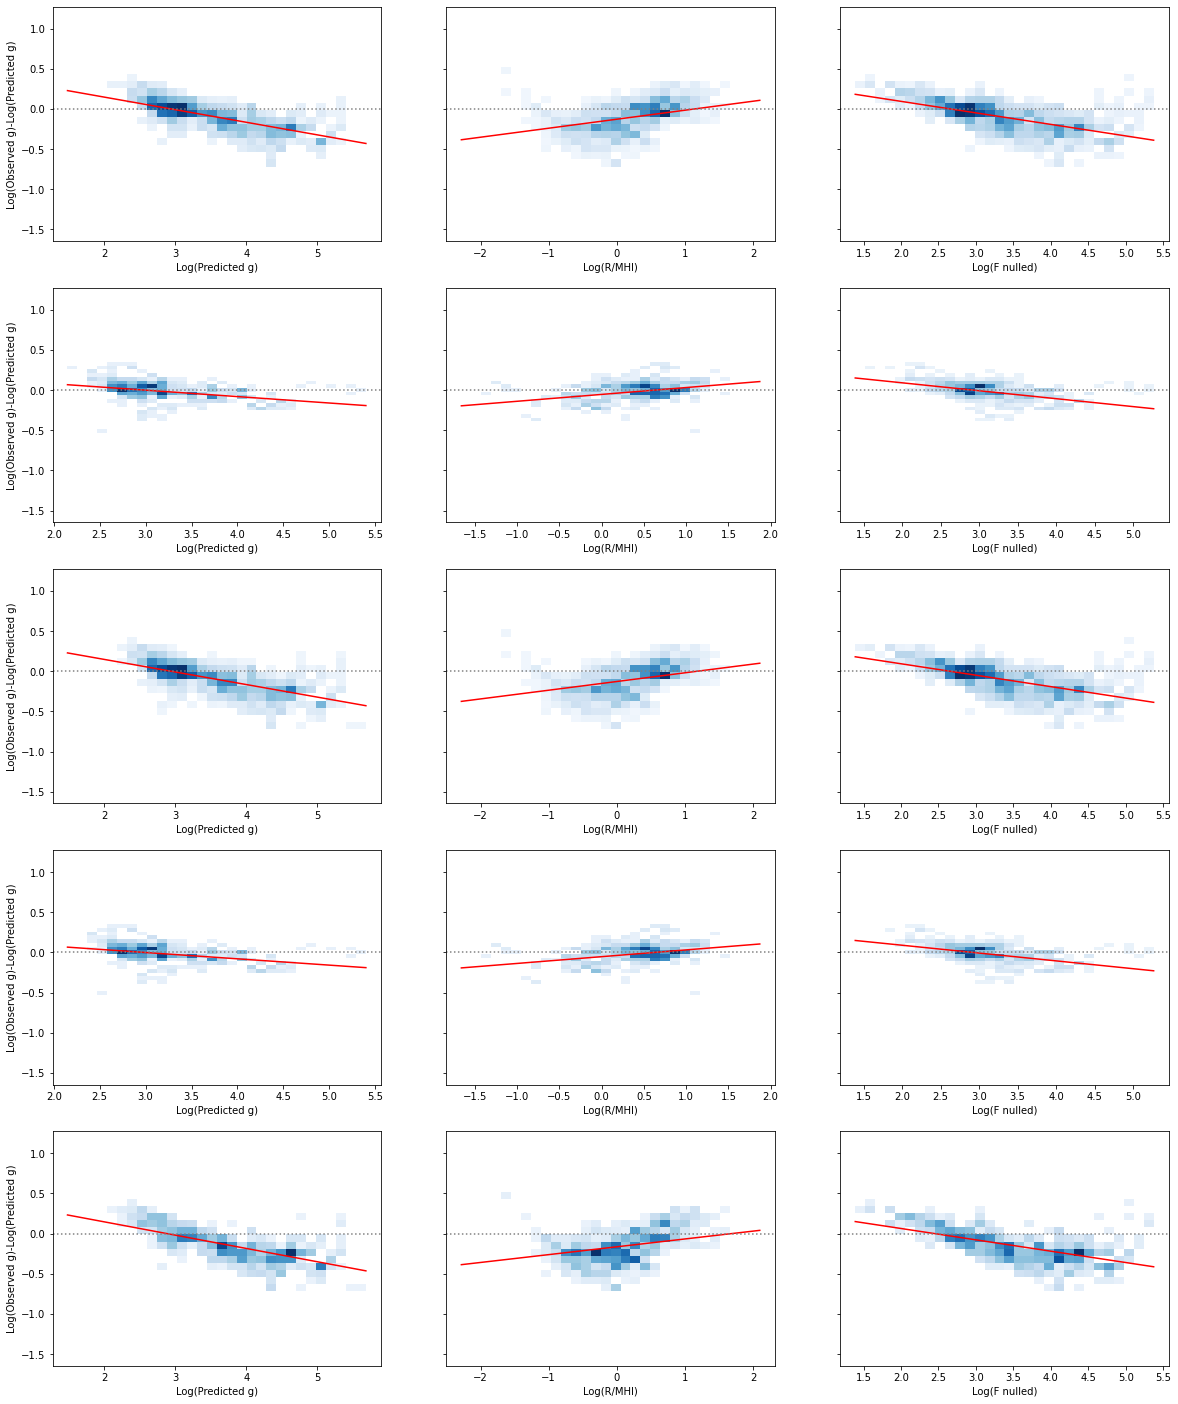

In [13]:
aa.result.plot_residuals()

In [15]:
adjs = adjustment_df()

In [19]:
import pandas as pd

In [20]:
adjs = adjs[adjs['Galaxy'].isin(aa.adjs['Galaxy'])]
adjs = pd.concat([adjs,aa.adjs], ignore_index=True)

In [29]:


import numpy as np

def plot_comparison(dfs, what_sources, compare, to_source='SPARC', sort=None, x_sort='Galaxy'):
    fig, axes = plt.subplots(3, 1, figsize=(20,10))
    
    # sort correctly
    to_df = dfs[dfs['Source']==to_source].sort_values(compare)
    indx = to_df.set_index(x_sort)
    indx['sort'] = np.arange(len(indx))
    
    for i, what_source in enumerate(what_sources):
        what_df = dfs[dfs['Source']==what_source]
        
        # 1. Absolutes
        ax = axes[0]
        
        # continue sort for both what's
        what_df = what_df.join(indx[['sort']], on=x_sort).sort_values('sort')
        
        # only plot reference once
        if i == 0:
            tx, ty, te = to_df[x_sort], to_df[compare], to_df["e_%s" % compare]
            ax.fill_between(tx, ty-2*te, ty+2*te, color='whitesmoke')
            ax.fill_between(tx, ty-te, ty+te, color='lightgrey')
            sns.lineplot(x=tx, y=ty, label=to_source, color='grey', ax=ax)
            sns.scatterplot(x=tx, y=ty, color='grey', ax=ax)
        
        color = ['teal', 'orange'][i]
        wx, wy, we = what_df[x_sort], what_df[compare], what_df["e_%s" % compare]    
        g = sns.scatterplot(data=what_df, x=wx, y=compare, label=what_source, ax=ax, color=color)
        g.errorbar(wx, wy, yerr=we, ecolor=color, fmt='.k', color=color)
        
        ax.set(xticklabels=[])
        
        # 2. Ratios
        ax = axes[1]
        yy = np.array(wy)/np.array(ty)
        if i == 0:
            ax.fill_between(tx, (ty-2*te)/ty, (ty+2*te)/ty, color='whitesmoke')
            ax.fill_between(tx, (ty-te)/ty, (ty+te)/ty, color='lightgrey')
        sns.scatterplot(x=tx, y=yy, ax=ax, color=color)
        ax.set(xticklabels=[])
        
        # 3. Histogram
        ax = axes[2]
        sns.histplot(yy, ax=ax, color=color)



/var/folders/xp/fglbvhls6671ywk1lqtr308w0000gn/T/ipykernel_12853/479782517.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  g.errorbar(wx, wy, yerr=we, ecolor=color, fmt='.k', color=color)
/var/folders/xp/fglbvhls6671ywk1lqtr308w0000gn/T/ipykernel_12853/479782517.py:33: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  g.errorbar(wx, wy, yerr=we, ecolor=color, fmt='.k', color=color)
/var/folders/xp/fglbvhls6671ywk1lqtr308w0000gn/T/ipykernel_12853/479782517.py:33: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  g.errorbar(wx, wy, yerr=we, ecolor=color, fmt='.k', color=color)


ValueError: operands could not be broadcast together with shapes (0,) (122,) 

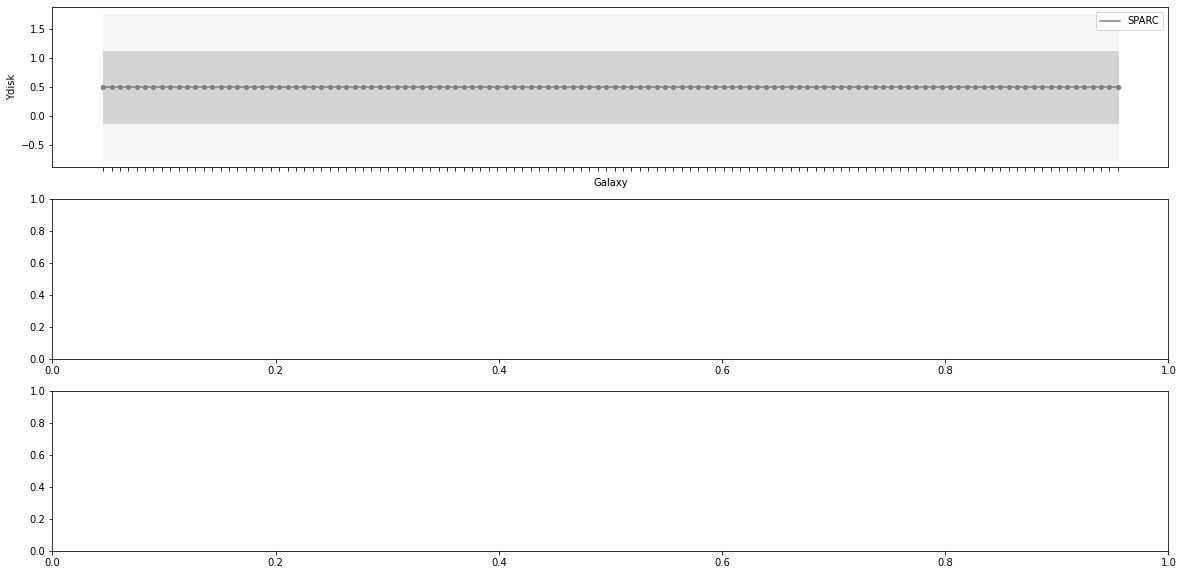

In [30]:
plot_comparison(adjs, ('None'), 'Ydisk')